In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns
from collections import Counter
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('C:/Users/User/Desktop/train.csv')
data

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,38,156,1,0,0,0,NaN,2,6,1
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,31,51,1,0,0,1,Laborers,3,5,1
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,52,147,1,0,1,0,Managers,2,22,2
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,41,69,1,0,1,0,Sales staff,2,37,0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,41,70,1,0,0,0,Managers,2,26,2
5,5,F,N,Y,2,270000.0,Working,Secondary / secondary special,Married,House / apartment,36,166,1,0,0,1,High skill tech staff,4,18,1
6,6,F,N,N,0,315000.0,Working,Secondary / secondary special,Separated,House / apartment,48,65,1,0,0,1,Core staff,1,41,2
7,7,M,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,40,180,1,0,0,1,Drivers,2,53,0
8,8,M,Y,Y,1,180000.0,Commercial associate,Higher education,Married,House / apartment,41,48,1,0,0,1,NaN,3,38,2
9,9,F,N,Y,0,103500.0,Working,Secondary / secondary special,Married,House / apartment,43,43,1,0,0,0,Medicine staff,2,5,2


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
index            26457 non-null int64
gender           26457 non-null object
car              26457 non-null object
reality          26457 non-null object
child_num        26457 non-null int64
income_total     26457 non-null float64
income_type      26457 non-null object
edu_type         26457 non-null object
family_type      26457 non-null object
house_type       26457 non-null object
DAYS_BIRTH       26457 non-null int64
DAYS_EMPLOYED    26457 non-null int64
FLAG_MOBIL       26457 non-null int64
work_phone       26457 non-null int64
phone            26457 non-null int64
email            26457 non-null int64
occyp_type       18286 non-null object
family_size      26457 non-null int64
begin_month      26457 non-null int64
credit           26457 non-null int64
dtypes: float64(1), int64(11), object(8)
memory usage: 4.0+ MB


In [5]:
data.describe()

,index,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
count,26457.000000,26457.000000,2.645700e+04,26457.000000,26457.000000,26457.0,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000
mean,13228.000000,0.428658,1.873065e+05,43.213478,2114.994897,1.0,0.224742,0.294251,0.091280,2.196848,26.123294,1.519560
std,7637.622372,0.747326,1.018784e+05,11.513590,4516.614433,0.0,0.417420,0.455714,0.288013,0.916717,16.559550,0.702283
min,0.000000,0.000000,2.700000e+04,21.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,6614.000000,0.000000,1.215000e+05,34.000000,38.000000,1.0,0.000000,0.000000,0.000000,2.000000,12.000000,1.000000
50%,13228.000000,0.000000,1.575000e+05,42.000000,83.000000,1.0,0.000000,0.000000,0.000000,2.000000,24.000000,2.000000
75%,19842.000000,1.000000,2.250000e+05,53.000000,187.000000,1.0,0.000000,1.000000,0.000000,3.000000,39.000000,2.000000
max,26456.000000,19.000000,1.575000e+06,68.000000,12174.000000,1.0,1.000000,1.000000,1.000000,20.000000,60.000000,2.000000


In [9]:
#엑셀(=IF(F2>=225000, 1, IF(F2>=157500, 2, IF(F2>=121500, 3, 4))))
#이용하여 사분위로 나누어 파생변수 생성.

data = pd.read_csv('C:/Users/User/Desktop/train.csv', encoding='utf8')
data

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,income_quintile
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,...,156,1,0,0,0,NaN,2,6,1,2
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,...,51,1,0,0,1,Laborers,3,5,1,1
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,...,147,1,0,1,0,Managers,2,22,2,1
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,69,1,0,1,0,Sales staff,2,37,0,2
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,...,70,1,0,0,0,Managers,2,26,2,2
5,5,F,N,Y,2,270000.0,Working,Secondary / secondary special,Married,House / apartment,...,166,1,0,0,1,High skill tech staff,4,18,1,1
6,6,F,N,N,0,315000.0,Working,Secondary / secondary special,Separated,House / apartment,...,65,1,0,0,1,Core staff,1,41,2,1
7,7,M,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,180,1,0,0,1,Drivers,2,53,0,1
8,8,M,Y,Y,1,180000.0,Commercial associate,Higher education,Married,House / apartment,...,48,1,0,0,1,NaN,3,38,2,2
9,9,F,N,Y,0,103500.0,Working,Secondary / secondary special,Married,House / apartment,...,43,1,0,0,0,Medicine staff,2,5,2,4


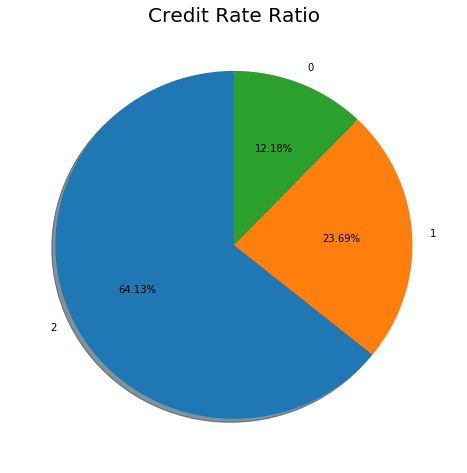

In [11]:
#신용 등급 비율
plt.subplots(figsize=(8,8))
plt.pie(data['credit'].value_counts(), labels = data['credit'].value_counts().index,
       autopct="%.2f%%", shadow=True, startangle=90)
plt.title('Credit Rate Ratio', size=20)
plt.show()
#신용 등급이 낮은 비율이 높다. (0:연체x, 1:연체?, 2:연체o)

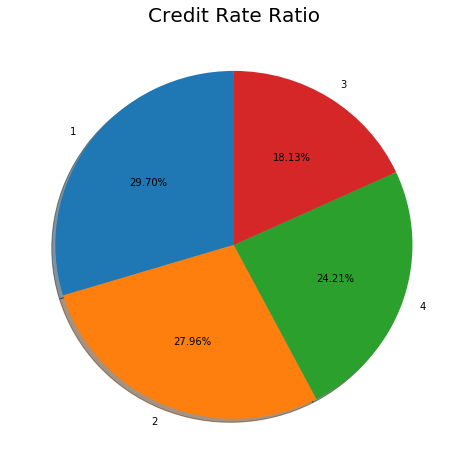

In [12]:
#소득 분위 비율
plt.subplots(figsize=(8,8))
plt.pie(data['income_quintile'].value_counts(), labels = data['income_quintile'].value_counts().index,
       autopct="%.2f%%", shadow=True, startangle=90)
plt.title('Credit Rate Ratio', size=20)
plt.show()
#1사분위(상위 75~100%): 1, 2사분위(상위 50~75%): 2,
#3사분위(상위 25~50%): 3, 4사분위(상위25% 이하): 4

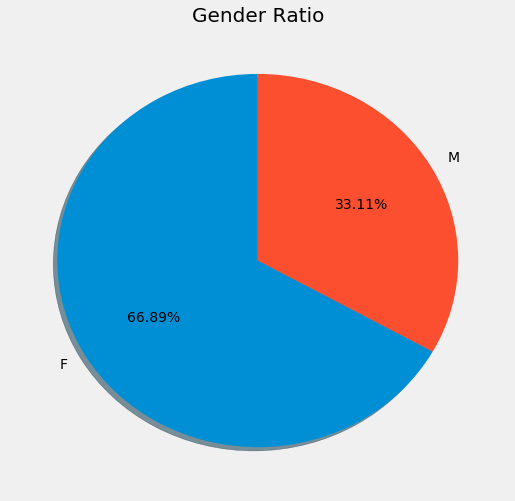

In [43]:
#남녀 비율
plt.subplots(figsize=(8,8))
plt.pie(data['gender'].value_counts(), labels = data['gender'].value_counts().index,
       autopct="%.2f%%", shadow=True, startangle=90)
plt.title('Gender Ratio', size=20)
plt.show()
#여성: 66.89%, 남성: 33.11%

In [14]:
#신용 등급에 따른 남녀 비율
data_credit0 = data[data['credit']==0]
data_credit1 = data[data['credit']==1]
data_credit2 = data[data['credit']==2]

In [23]:
def cat_plot(column):
    f, ax = plt.subplots(1, 3, figsize=(15, 6))
    
    sns.countplot(x=column,
                 data=data_credit0,
                  ax=ax[0],
                  order=data_credit0[column].value_counts().index)
    ax[0].tick_params(labelsize=12)
    ax[0].set_title('Credit = 0')
    ax[0].set_ylabel('count')
    ax[0].tick_params(rotation=50)
    
    sns.countplot(x=column,
                 data=data_credit1,
                  ax=ax[1],
                  order=data_credit1[column].value_counts().index)
    ax[1].tick_params(labelsize=12)
    ax[1].set_title('Credit = 1')
    ax[1].set_ylabel('count')
    ax[1].tick_params(rotation=50)
    
    sns.countplot(x=column,
                 data=data_credit2,
                  ax=ax[2],
                  order=data_credit2[column].value_counts().index)
    ax[2].tick_params(labelsize=12)
    ax[2].set_title('Credit = 2')
    ax[2].set_ylabel('count')
    ax[2].tick_params(rotation=50)
    
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    plt.show()

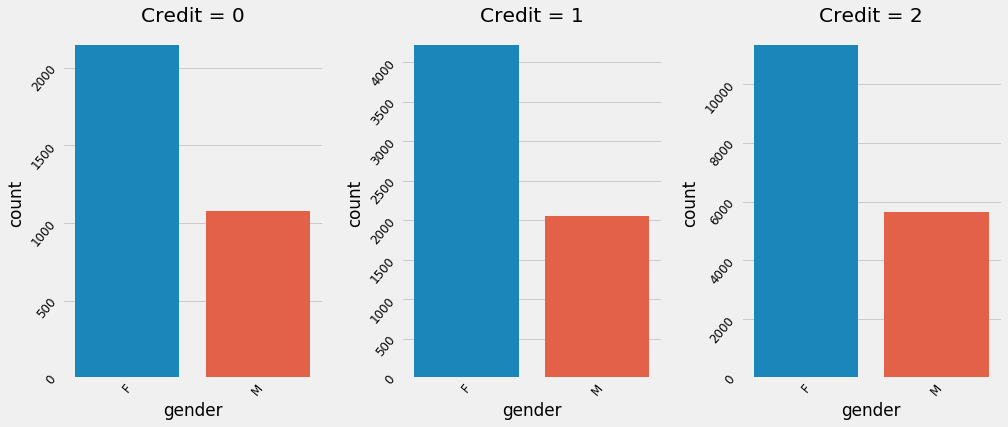

In [24]:
cat_plot('gender')
#모든 등급에서 남녀 비율이 거의 비슷하다.

In [39]:
#남성 데이터 총 8760
data_M = data[data['gender']=='M']
data_M

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,income_quintile
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,...,147,1,0,1,0,Managers,2,22,2,1
7,7,M,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,180,1,0,0,1,Drivers,2,53,0,1
8,8,M,Y,Y,1,180000.0,Commercial associate,Higher education,Married,House / apartment,...,48,1,0,0,1,NaN,3,38,2,2
11,11,M,Y,Y,1,135000.0,Commercial associate,Higher education,Married,House / apartment,...,3,1,0,0,0,Managers,3,51,2,3
15,15,M,Y,Y,2,157500.0,Working,Secondary / secondary special,Married,With parents,...,135,1,0,1,0,Drivers,4,60,0,2
16,16,M,N,Y,0,180000.0,Working,Secondary / secondary special,Married,House / apartment,...,151,1,0,1,0,Laborers,2,2,1,2
17,17,M,N,N,0,270000.0,Commercial associate,Secondary / secondary special,Civil marriage,With parents,...,32,1,0,0,1,Sales staff,2,14,2,1
20,20,M,N,N,0,180000.0,Working,Secondary / secondary special,Married,House / apartment,...,58,1,0,1,0,NaN,2,35,2,2
23,23,M,Y,N,0,225000.0,Working,Secondary / secondary special,Married,Municipal apartment,...,14,1,1,1,1,NaN,2,18,2,1
26,26,M,Y,N,1,135000.0,Working,Higher education,Married,House / apartment,...,111,1,1,0,0,Laborers,3,13,2,3


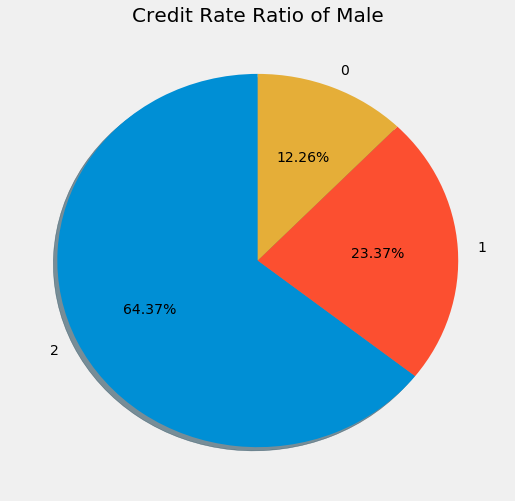

In [42]:
#남성의 신용등급 분포도
plt.subplots(figsize=(8,8))
plt.pie(data_M['credit'].value_counts(), labels = data_M['credit'].value_counts().index,
       autopct="%.2f%%", shadow=True, startangle=90)
plt.title('Credit Rate Ratio of Male', size=20)
plt.show()

In [44]:
#여성 데이터 총 17697
data_F = data[data['gender']=='F']
data_F

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,income_quintile
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,...,156,1,0,0,0,NaN,2,6,1,2
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,...,51,1,0,0,1,Laborers,3,5,1,1
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,69,1,0,1,0,Sales staff,2,37,0,2
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,...,70,1,0,0,0,Managers,2,26,2,2
5,5,F,N,Y,2,270000.0,Working,Secondary / secondary special,Married,House / apartment,...,166,1,0,0,1,High skill tech staff,4,18,1,1
6,6,F,N,N,0,315000.0,Working,Secondary / secondary special,Separated,House / apartment,...,65,1,0,0,1,Core staff,1,41,2,1
9,9,F,N,Y,0,103500.0,Working,Secondary / secondary special,Married,House / apartment,...,43,1,0,0,0,Medicine staff,2,5,2,4
10,10,F,N,Y,0,193500.0,Working,Secondary / secondary special,Separated,House / apartment,...,73,1,1,1,1,Laborers,1,40,2,2
12,12,F,Y,Y,1,157500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,72,1,0,0,0,Accountants,3,60,0,2
13,13,F,N,N,0,135000.0,Working,Higher education,Married,House / apartment,...,82,1,0,1,0,Sales staff,2,41,2,3


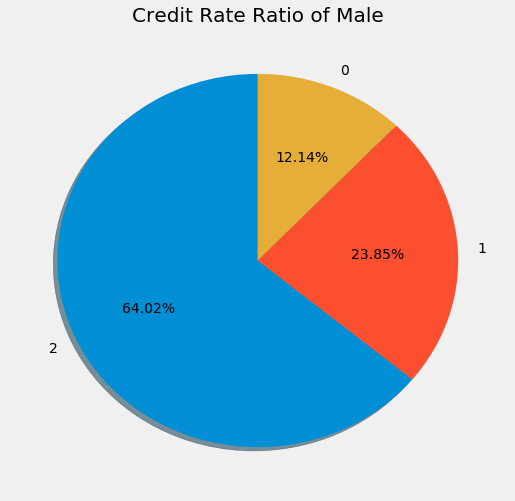

In [46]:
#여성의 신용등급 분포도
plt.subplots(figsize=(8,8))
plt.pie(data_F['credit'].value_counts(), labels = data_F['credit'].value_counts().index,
       autopct="%.2f%%", shadow=True, startangle=90)
plt.title('Credit Rate Ratio of Male', size=20)
plt.show()

In [ ]:
#성별로 본 결과, 데이터의 신용등급 비율이 거의 일정함을 알 수 있음.

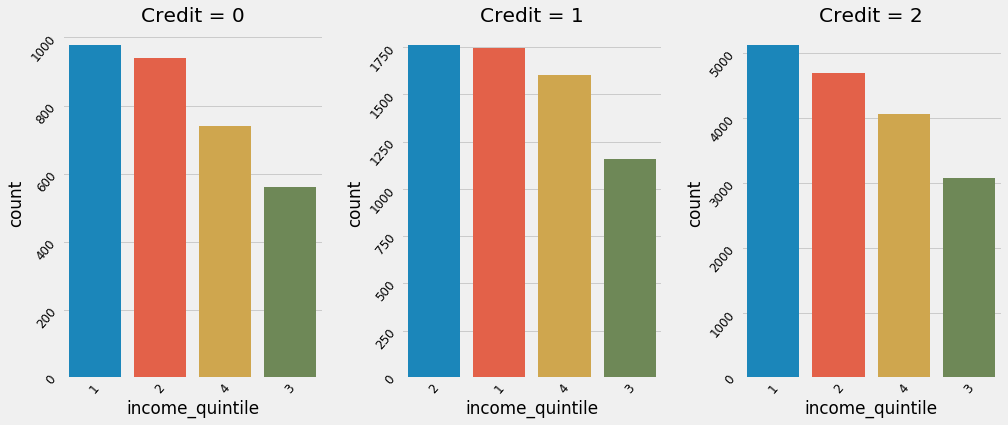

In [47]:
#이번에는 신용등급으로 보는 소득 사분위 분포
cat_plot('income_quintile')

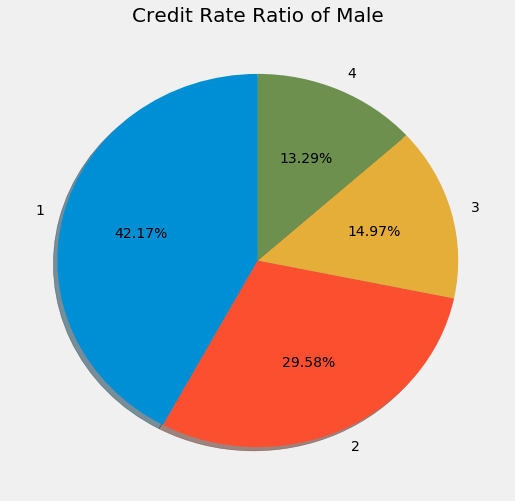

In [48]:
#남성의 소득 사분위 분포도
plt.subplots(figsize=(8,8))
plt.pie(data_M['income_quintile'].value_counts(), labels = data_M['income_quintile'].value_counts().index,
       autopct="%.2f%%", shadow=True, startangle=90)
plt.title('Credit Rate Ratio of Male', size=20)
plt.show()

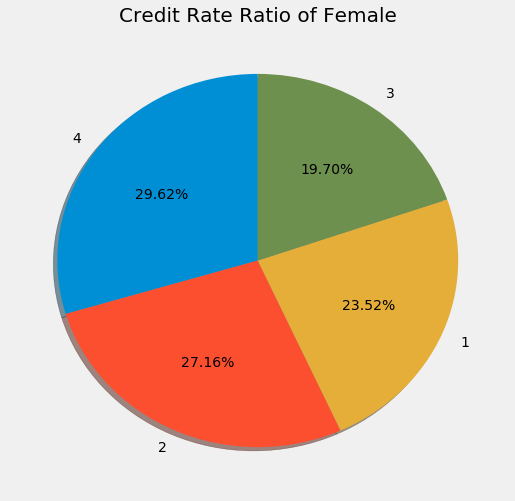

In [57]:
#여성의 소득 사분위 분포도
plt.subplots(figsize=(8,8))
plt.pie(data_F['income_quintile'].value_counts(), labels = data_F['income_quintile'].value_counts().index,
       autopct="%.2f%%", shadow=True, startangle=90)
plt.title('Credit Rate Ratio of Female', size=20)
plt.show()

In [50]:
#남성과 여성의 소득 수준이 1,2분위가 약 5.5%차이가 나므로 어느정도 남녀 소득격차가 있다.

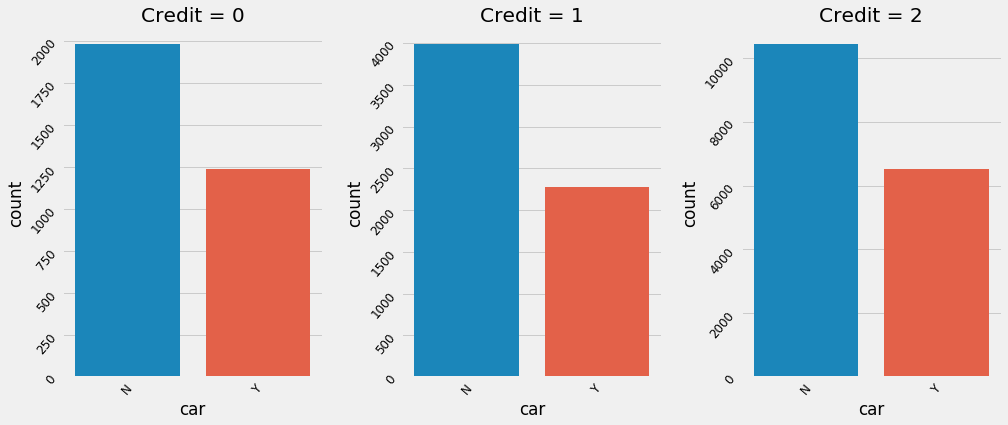

In [51]:
cat_plot('car')

In [ ]:
#모든 등급에서 차의 여부는 비슷하다.

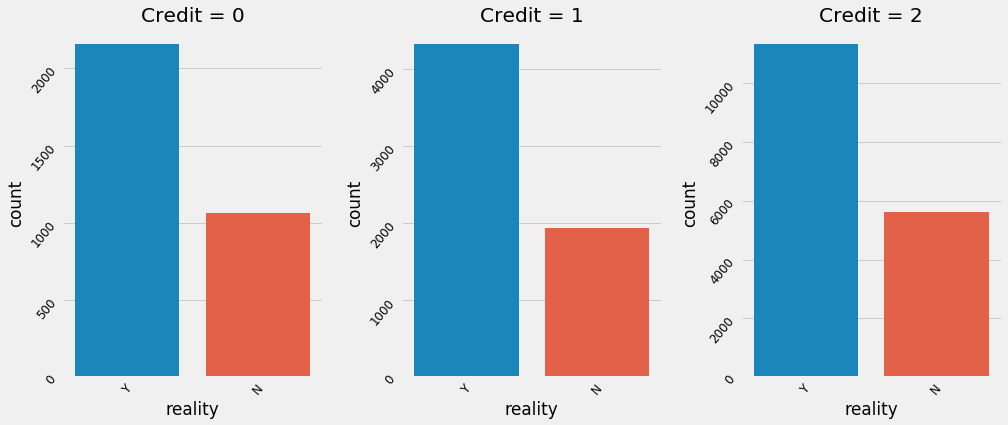

In [60]:
#신용등급 별 부동산 소유 여부는 비슷.
cat_plot('reality')

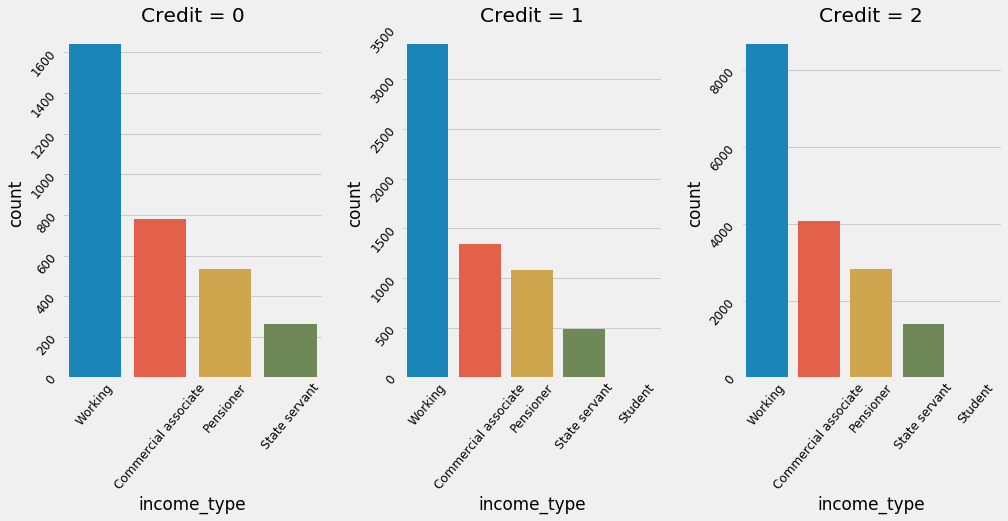

In [61]:
#신용등급 별 수입방법도 비슷.
cat_plot('income_type')

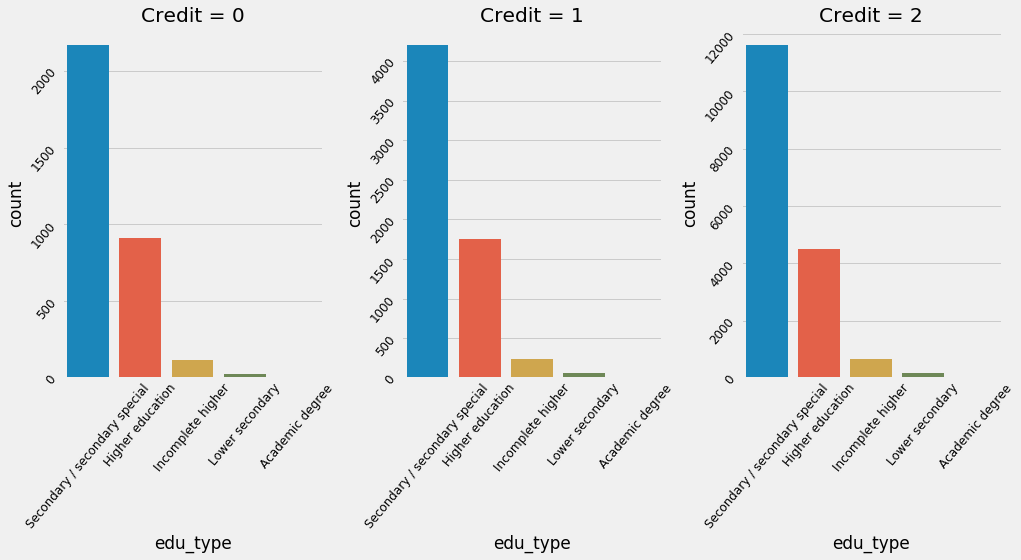

In [62]:
#교육 분포도 비슷.
cat_plot('edu_type')

In [54]:
#성별 분포도 비교

def gender_plot(column):
    f, ax = plt.subplots(1, 2, figsize=(10, 6))

    sns.countplot(x=column,
                 data=data_M,
                  ax=ax[0],
                  order=data_M[column].value_counts().index)
    ax[0].tick_params(labelsize=12)
    ax[0].set_title('Male')
    ax[0].set_ylabel('count')
    ax[0].tick_params(rotation=50)

    sns.countplot(x=column,
                 data=data_F,
                  ax=ax[1],
                  order=data_F[column].value_counts().index)
    ax[1].tick_params(labelsize=12)
    ax[1].set_title('Female')
    ax[1].set_ylabel('count')
    ax[1].tick_params(rotation=50)
    
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    plt.show()

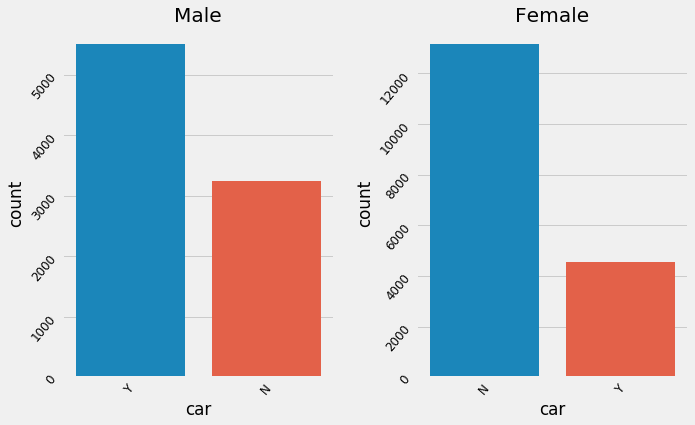

In [55]:
#여성은 차가 없는것이 대부분이고, 남성은 차가 있는것이 대부분.
gender_plot('car')

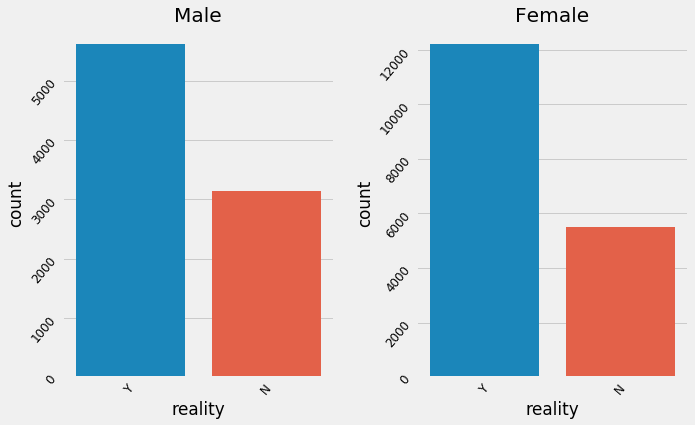

In [56]:
#남녀 둘다 부동산을 가지고 있는 편.
gender_plot('reality')

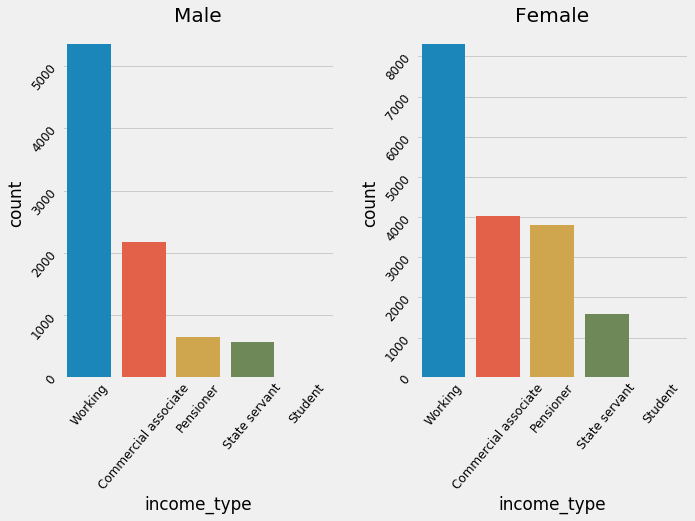

In [58]:
#남녀 소득 방법
gender_plot('income_type')

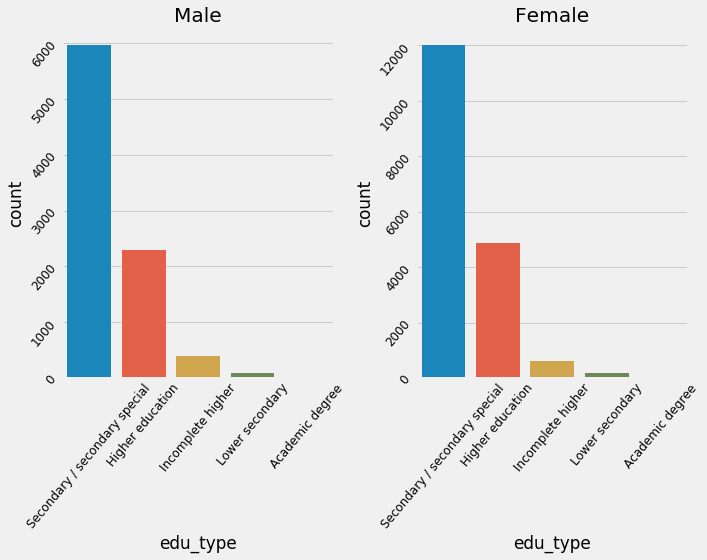

In [59]:
#남녀 교육수준
gender_plot('edu_type')

In [65]:
#소득분위별 비율을 알아보자.
data_quintile1 = data[data['income_quintile']==1]
data_quintile2 = data[data['income_quintile']==2]
data_quintile3 = data[data['income_quintile']==3]
data_quintile4 = data[data['income_quintile']==4]

In [79]:
def quintile_plot(column):
    f, ax = plt.subplots(2, 2, figsize=(20, 30))
    
    sns.countplot(x=column,
                 data=data_quintile1,
                  ax=ax[0][0],
                  order=data_quintile1[column].value_counts().index)
    ax[0][0].tick_params(labelsize=12)
    ax[0][0].set_title('Income_quintile = 1')
    ax[0][0].set_ylabel('count')
    ax[0][0].tick_params(rotation=50)
    
    sns.countplot(x=column,
                 data=data_quintile2,
                  ax=ax[0][1],
                  order=data_quintile2[column].value_counts().index)
    ax[0][1].tick_params(labelsize=12)
    ax[0][1].set_title('Income_quintile = 2')
    ax[0][1].set_ylabel('count')
    ax[0][1].tick_params(rotation=50)
    
    sns.countplot(x=column,
                 data=data_quintile3,
                  ax=ax[1][0],
                  order=data_quintile3[column].value_counts().index)
    ax[1][0].tick_params(labelsize=12)
    ax[1][0].set_title('Income_quintile = 3')
    ax[1][0].set_ylabel('count')
    ax[1][0].tick_params(rotation=50)
    
    sns.countplot(x=column,
                 data=data_quintile4,
                  ax=ax[1][1],
                  order=data_quintile4[column].value_counts().index)
    ax[1][1].tick_params(labelsize=12)
    ax[1][1].set_title('Income_quintile = 4')
    ax[1][1].set_ylabel('count')
    ax[1][1].tick_params(rotation=50)
    
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    plt.show()

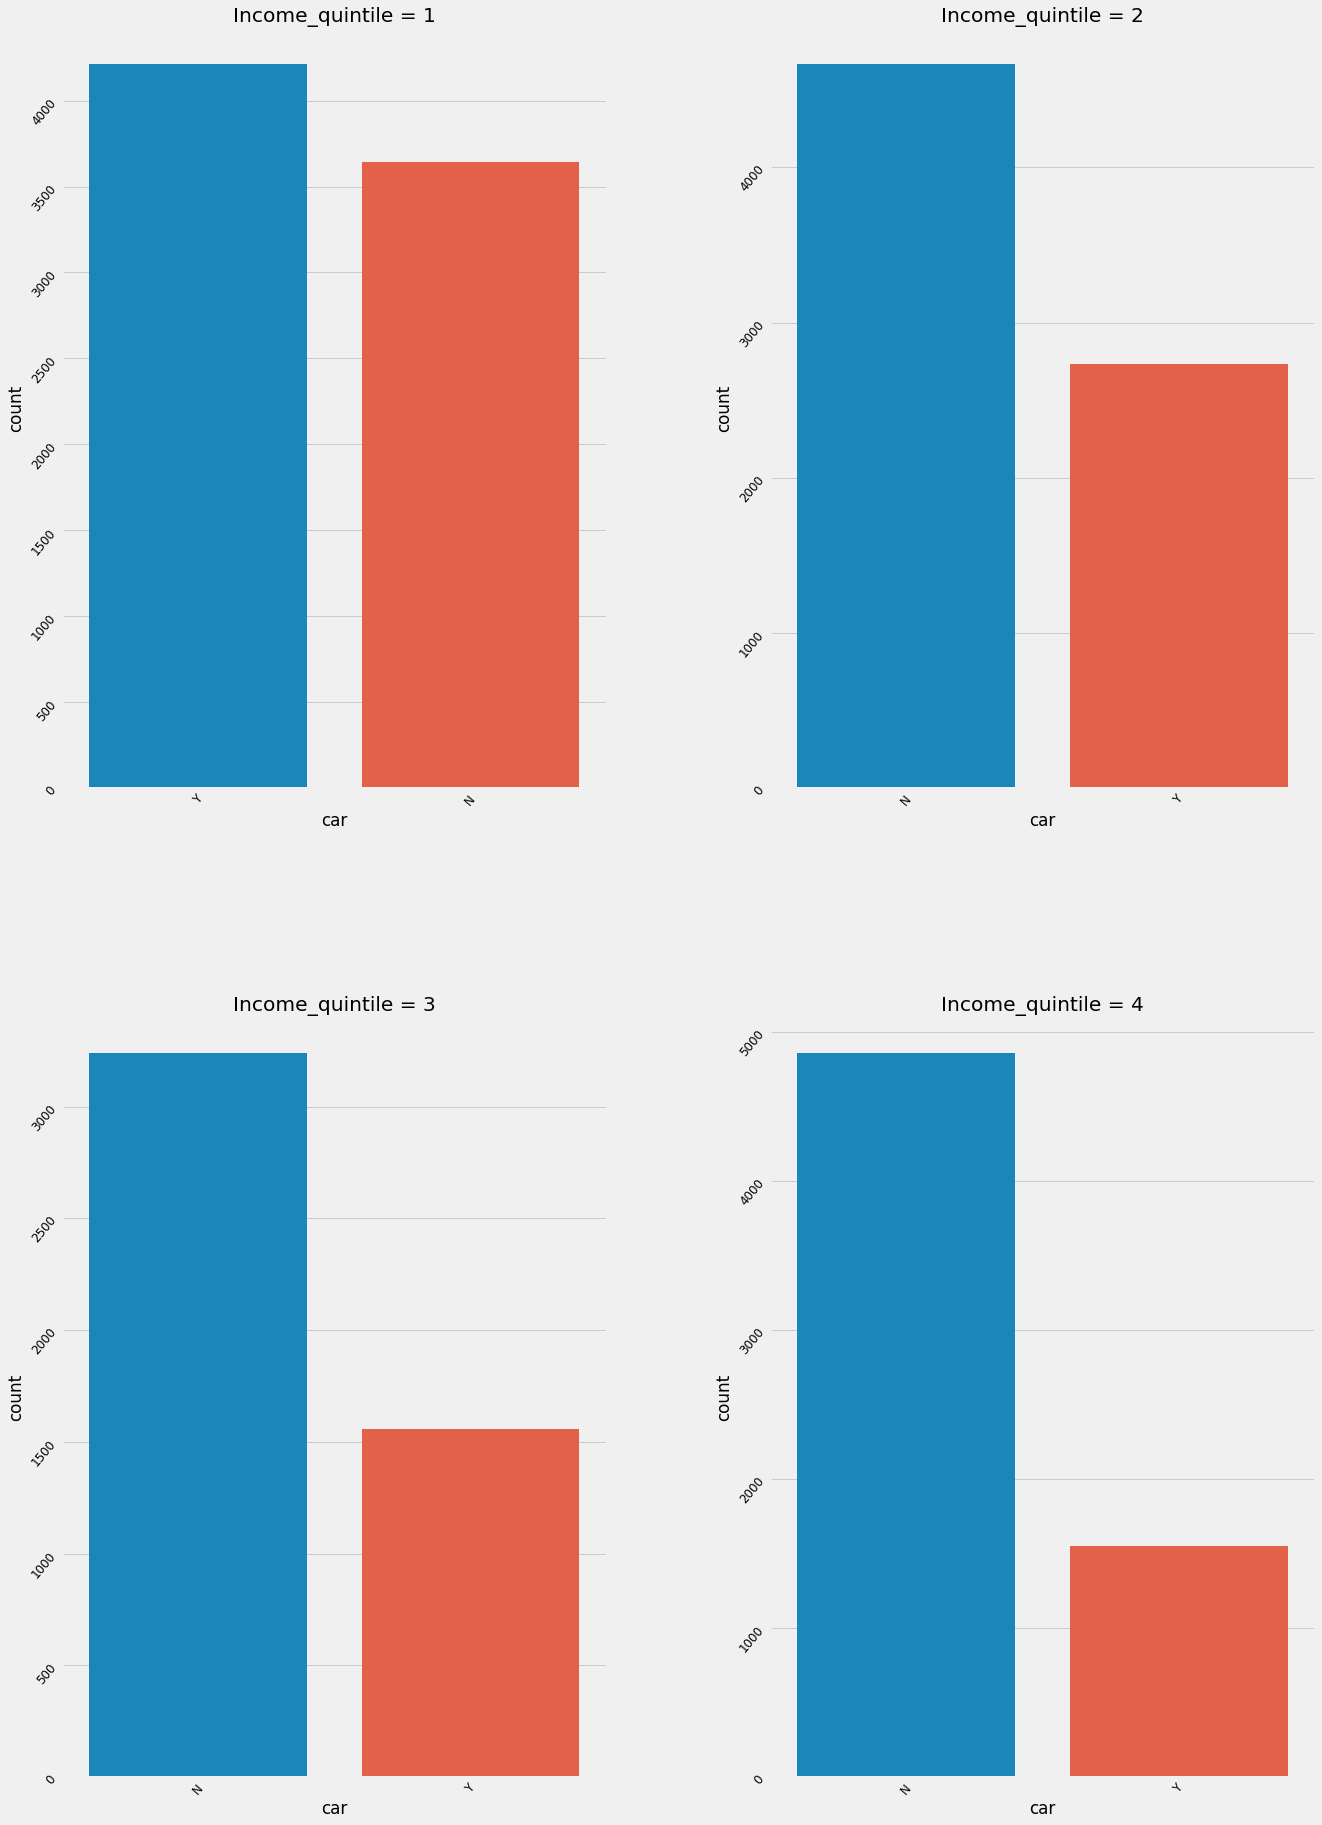

In [80]:
#소득이 1분위이면 차가 있는 비율이 좀더 높음.
quintile_plot('car')

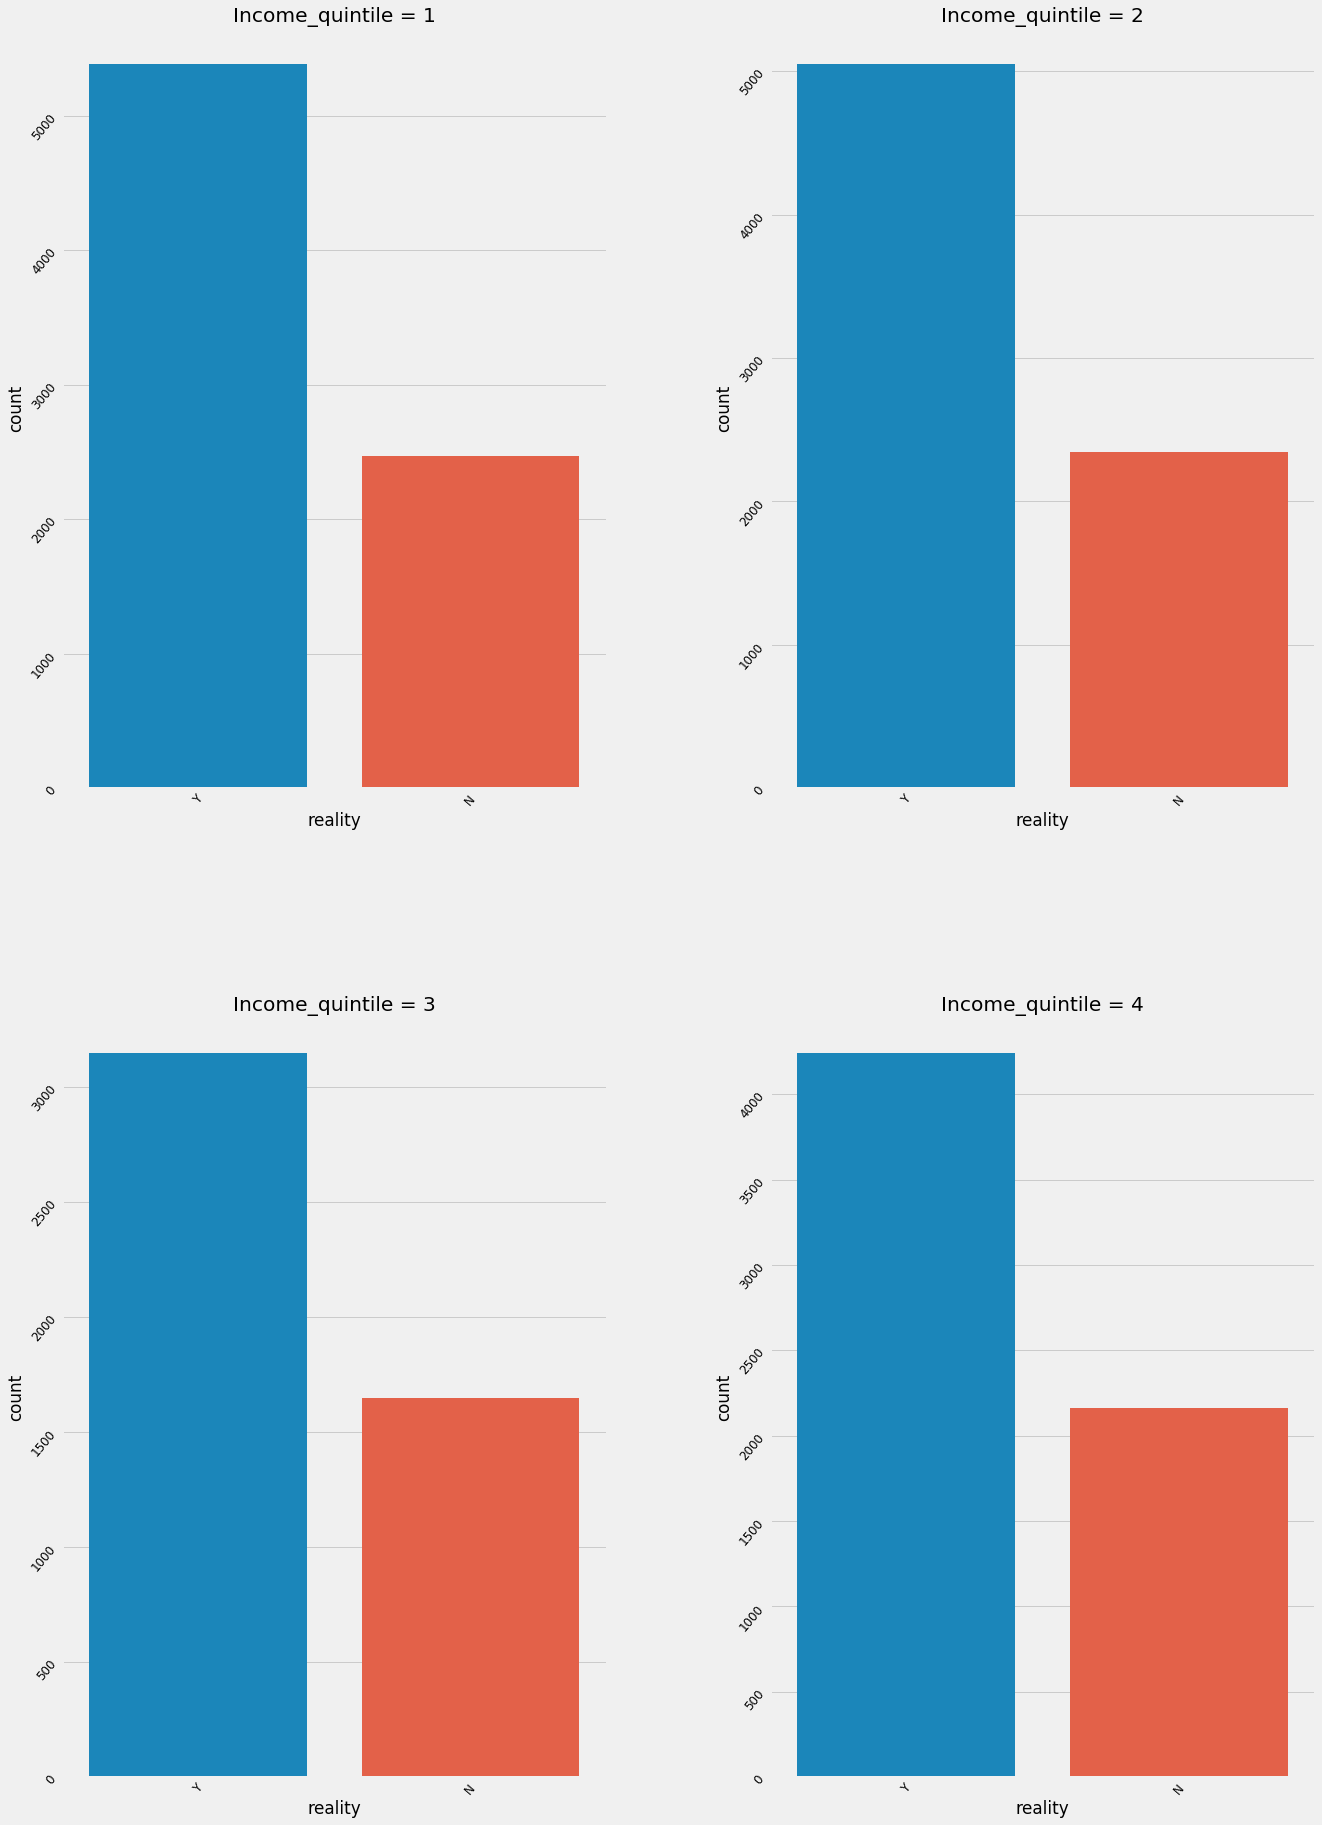

In [81]:
#부동산은 소득분위 상관없이 다 있음.
quintile_plot('reality')

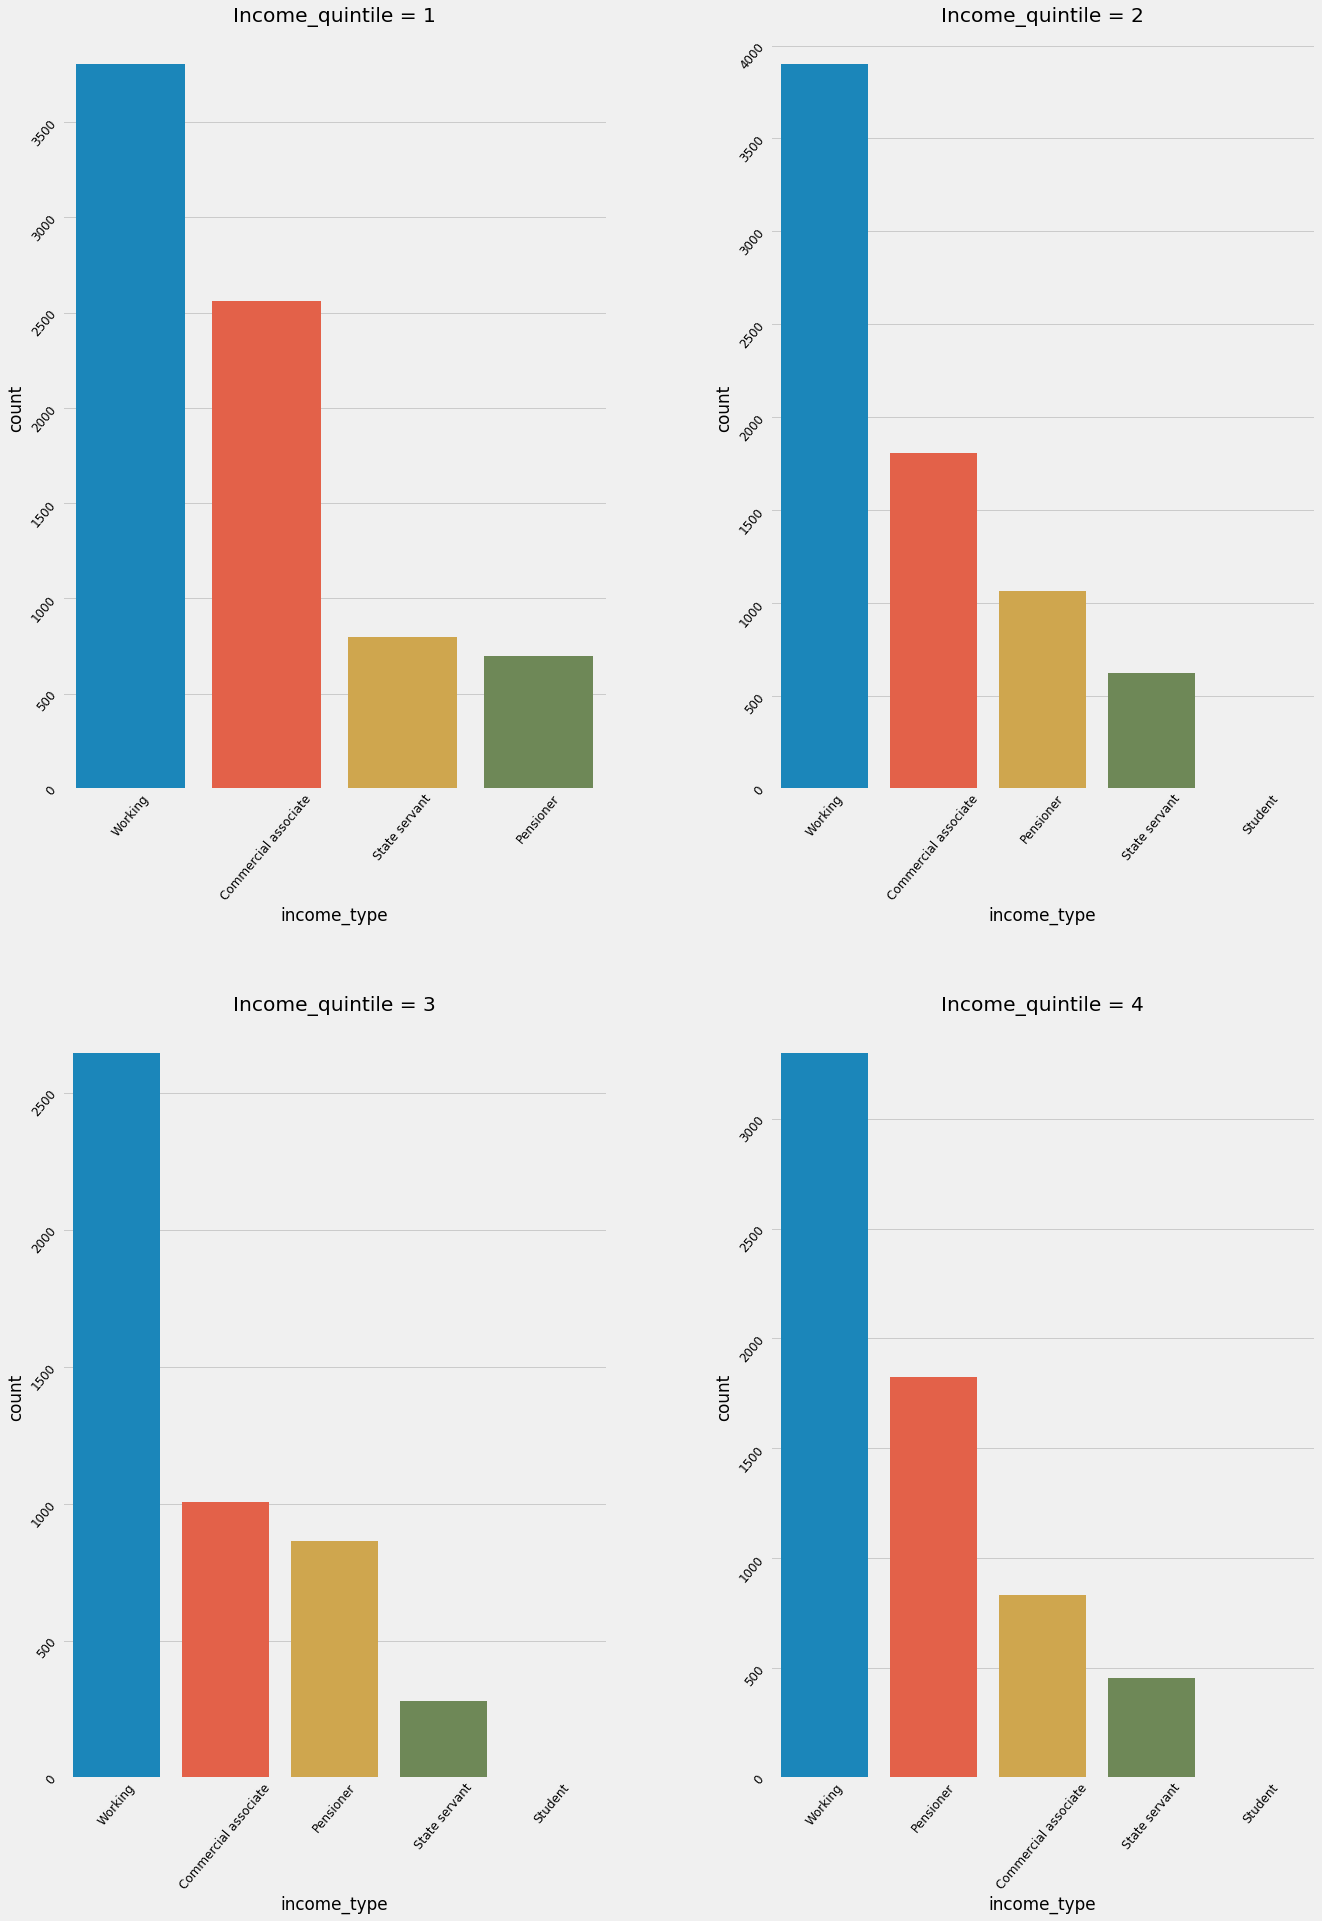

In [82]:
#소득분위에 상관없이 working 비율이 가장 높고,
#소득분위가 높아질수록 상업관련 직종이 많아진다.
quintile_plot('income_type')

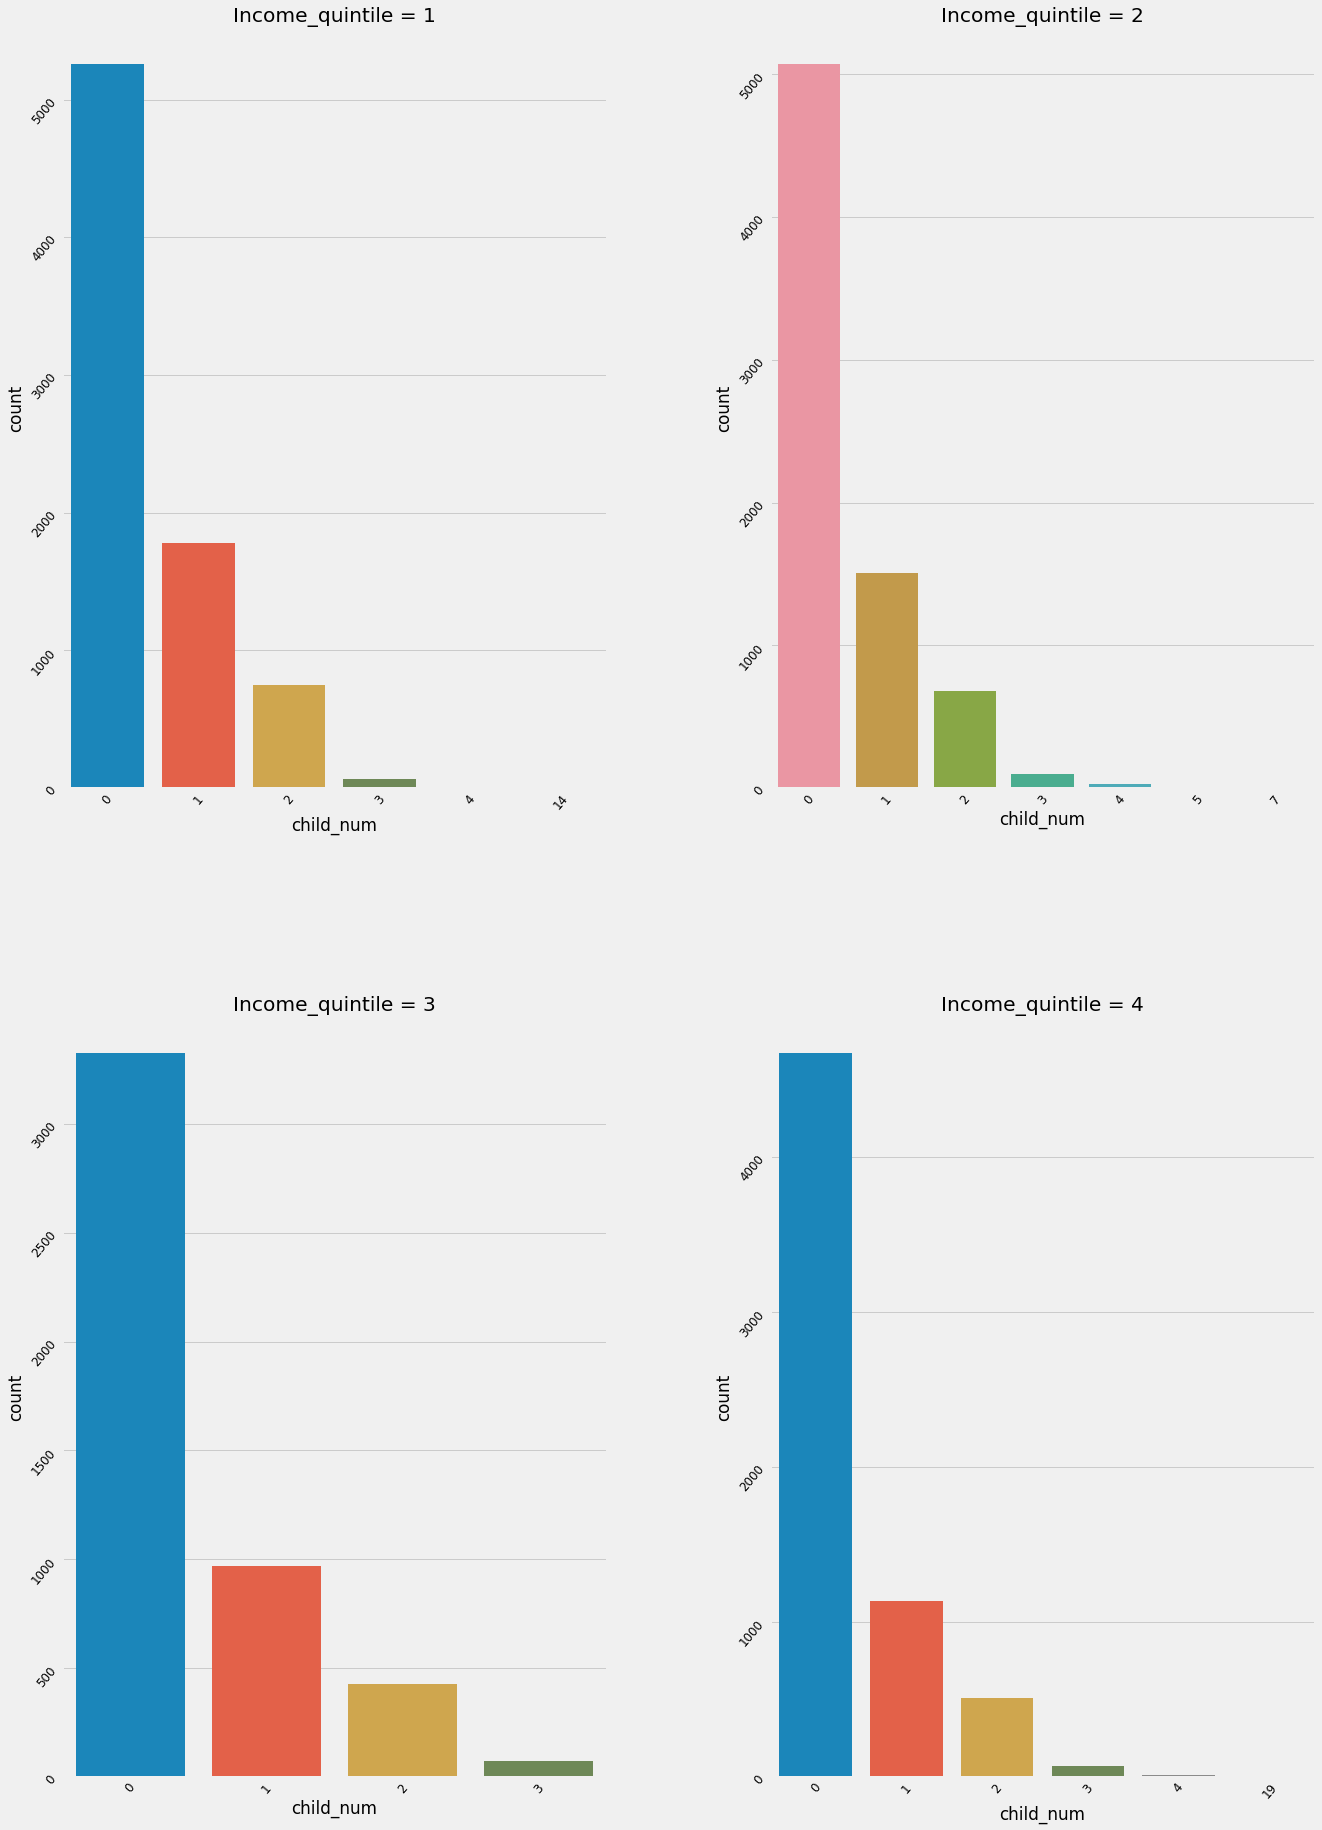

In [83]:
#소득에 상관없이 대부분이 아이가 없다.
quintile_plot('child_num')

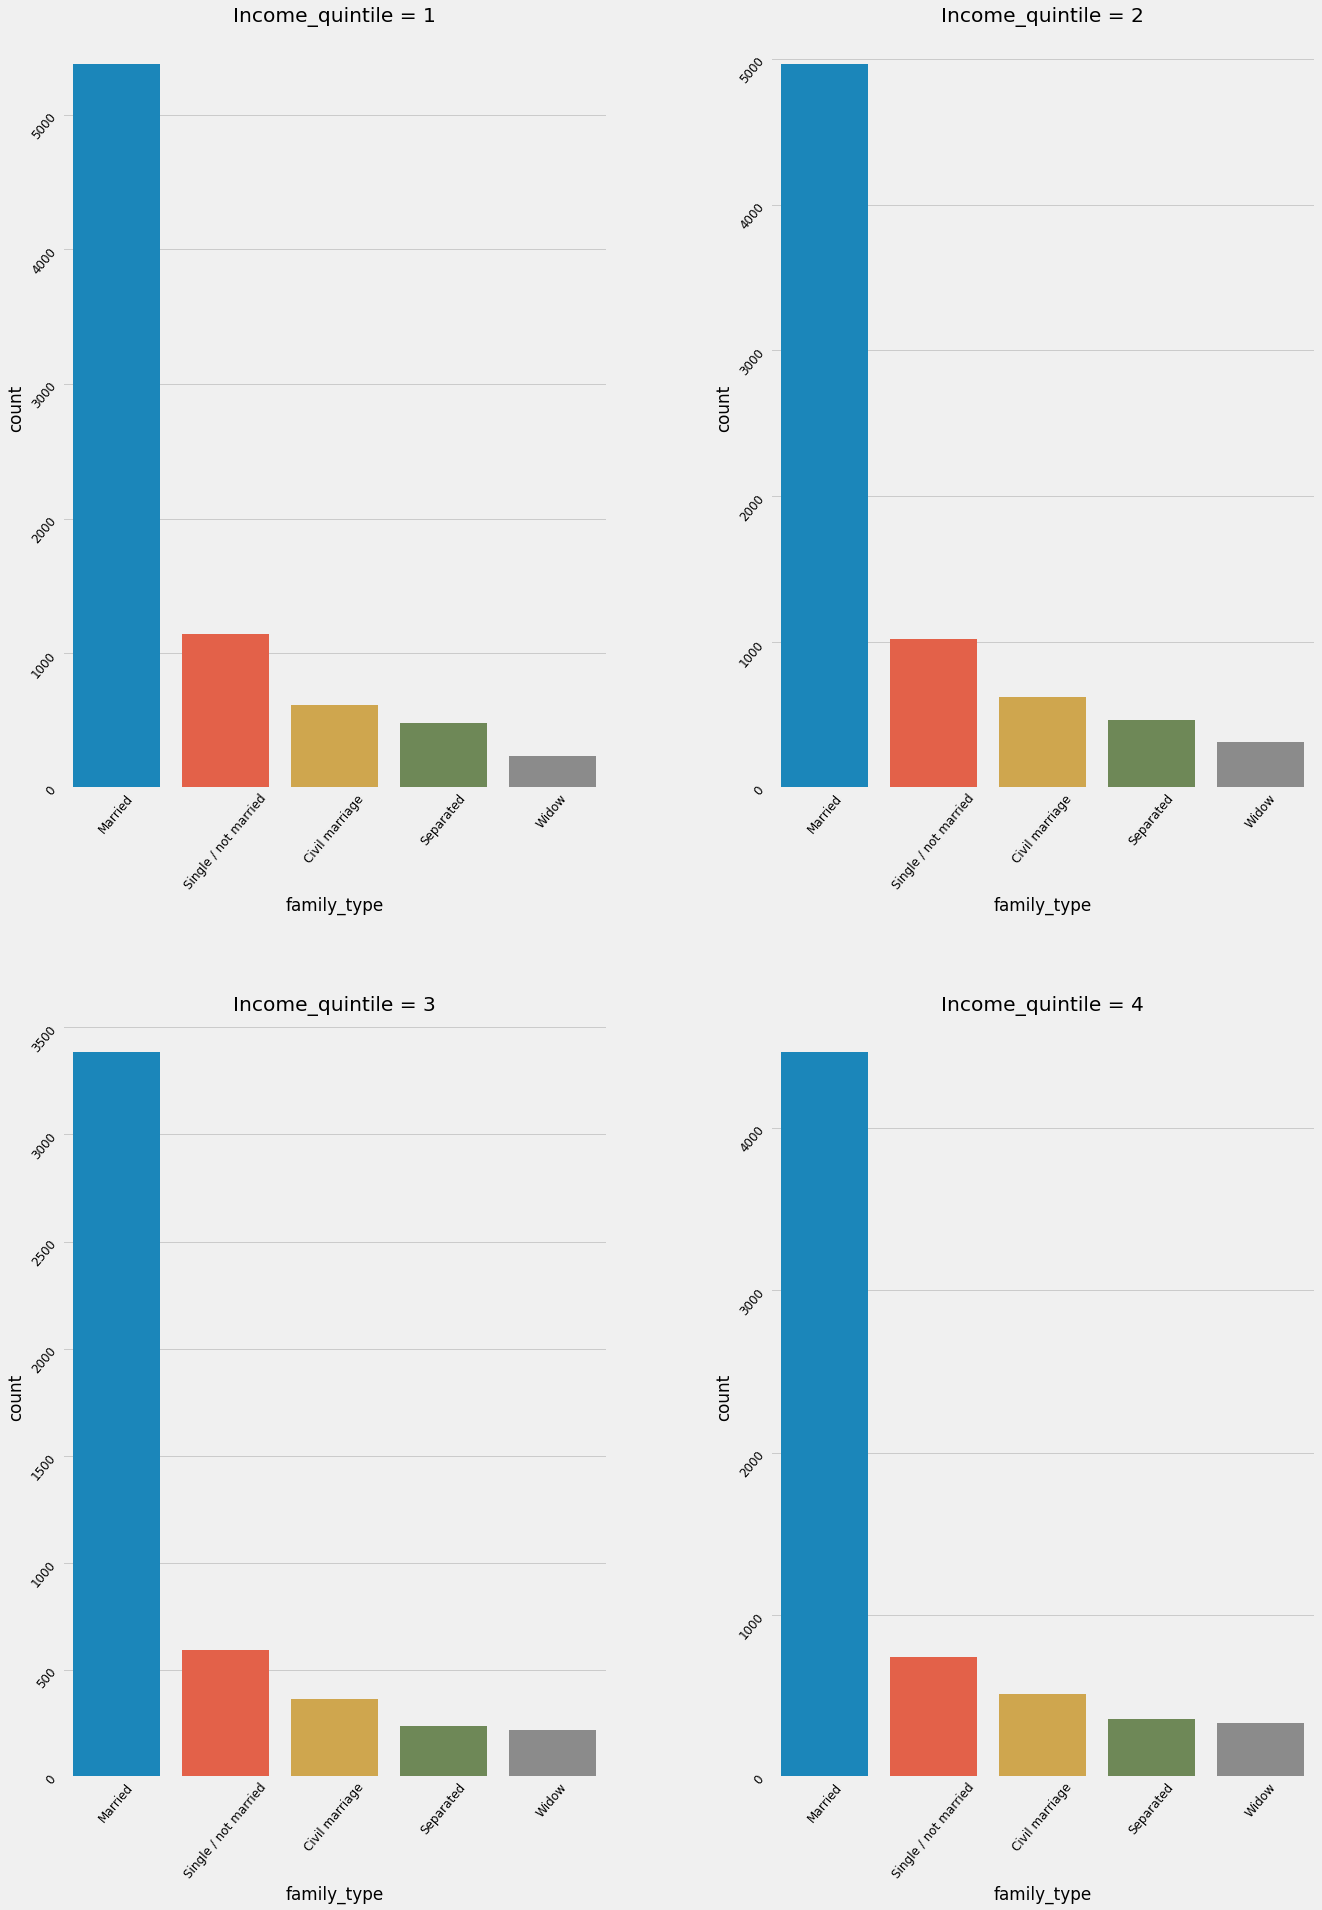

In [84]:
quintile_plot('family_type')

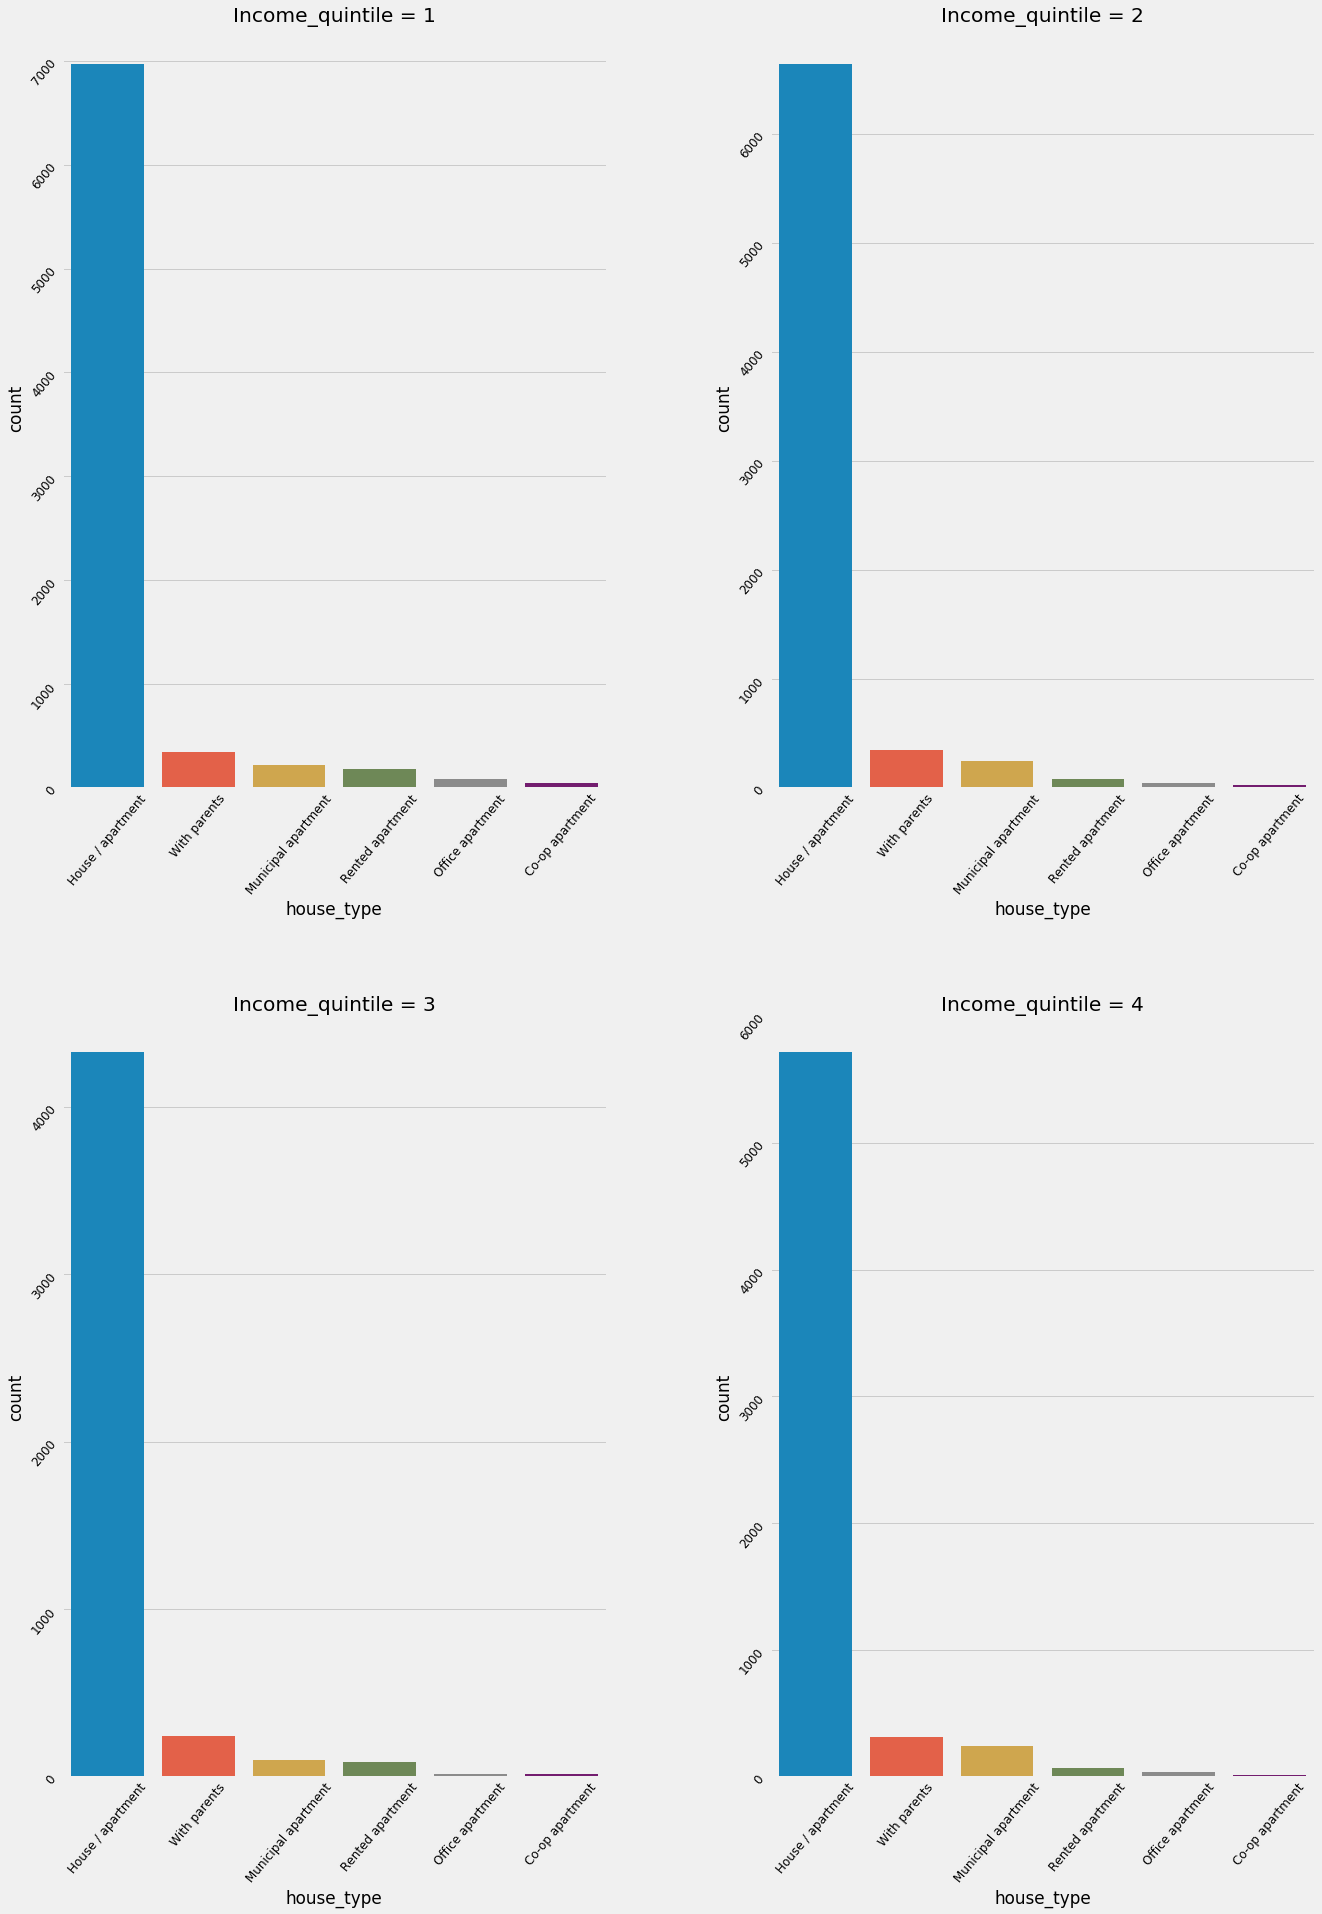

In [87]:
quintile_plot('house_type')

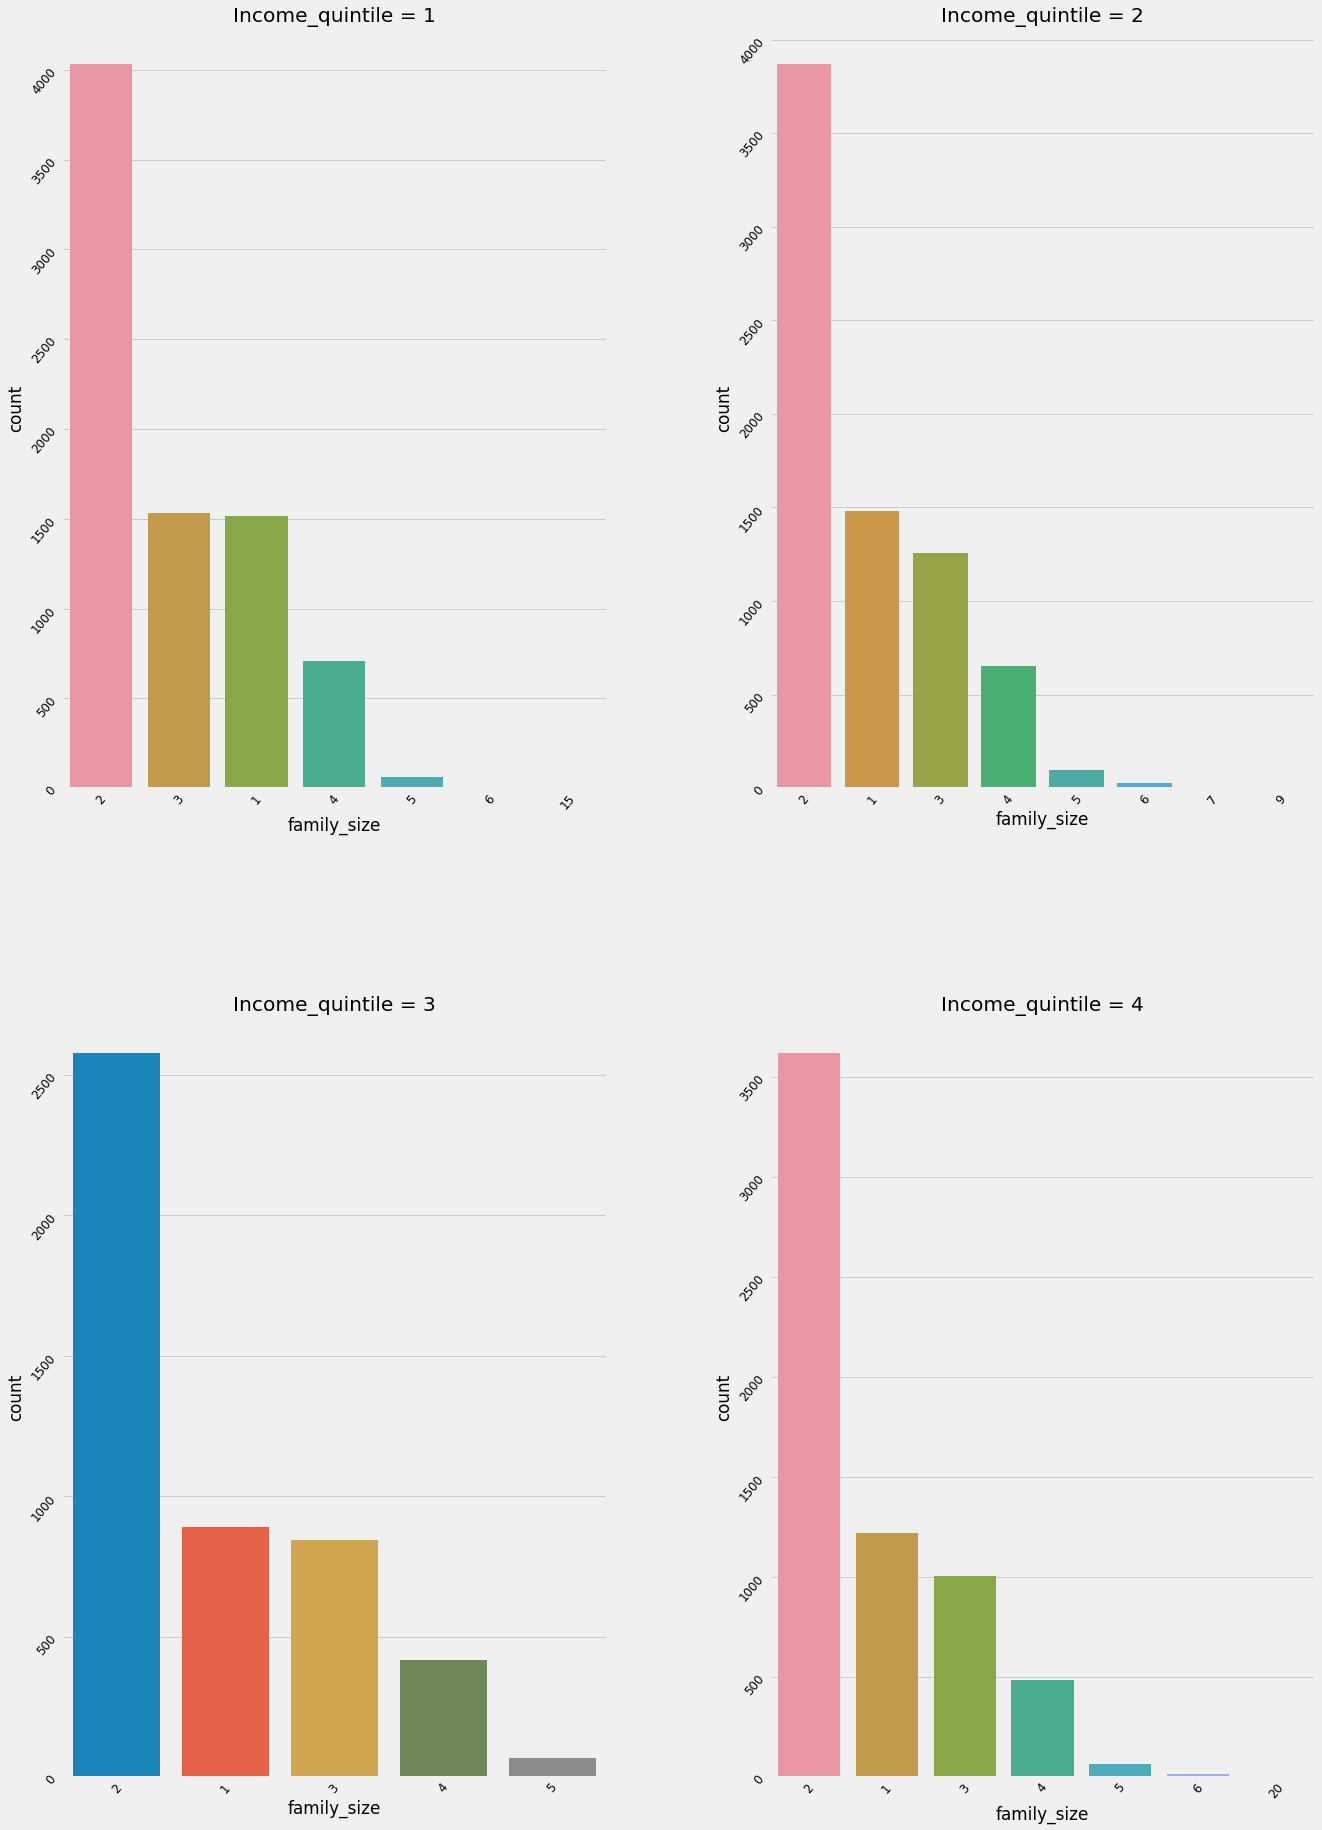

In [89]:
quintile_plot('family_size')

In [90]:
def num_plot(column):
  
  fig, axes = plt.subplots(1, 3, figsize=(16, 6))


  sns.distplot(data_credit0[column],
                ax = axes[0])
  axes[0].tick_params(labelsize=12)
  axes[0].set_title('credit = 0')
  axes[0].set_ylabel('count')

  sns.distplot(data_credit1[column],
                ax = axes[1])
  axes[1].tick_params(labelsize=12)
  axes[1].set_title('credit = 1')
  axes[1].set_ylabel('count')

  sns.distplot(data_credit2[column],
                ax = axes[2])
  axes[2].tick_params(labelsize=12)
  axes[2].set_title('credit = 2')
  axes[2].set_ylabel('count')
  plt.subplots_adjust(wspace=0.3, hspace=0.3)

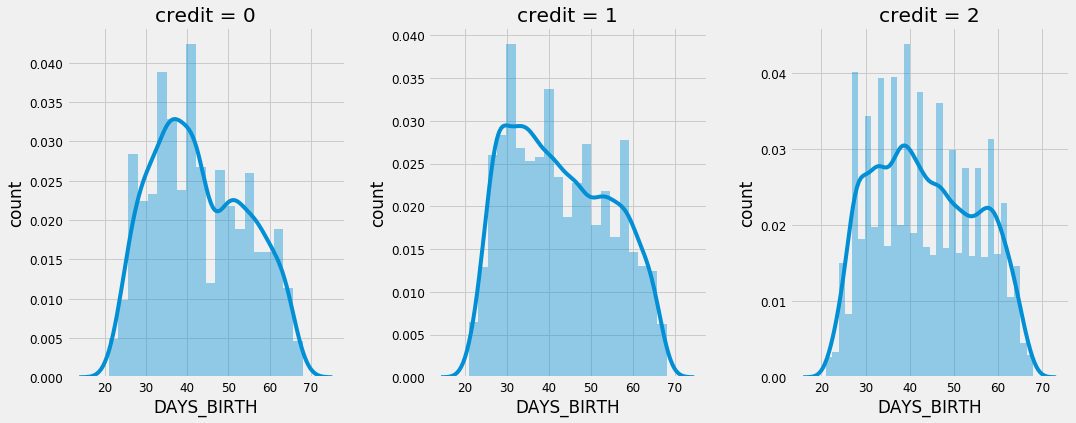

In [91]:
num_plot('DAYS_BIRTH')